In [19]:
from Dataset import *
from Models import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn.metrics import *
import pandas as pd
import sklearn
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import *
from sklearn.feature_selection import *
import seaborn as sns
from sklearn.neural_network import MLPClassifier
sns.set()


data, training, testing = loader('3425_data.csv', 'Q8a')
training_x = training.drop(columns=['opinionated'])
training_y = training['opinionated']
testing_x = testing.drop(columns=['opinionated'])
testing_y = testing['opinionated']

In [20]:
data.to_csv(r'Data.csv', index = False)

Text(0.5, 1, 'Correlation')

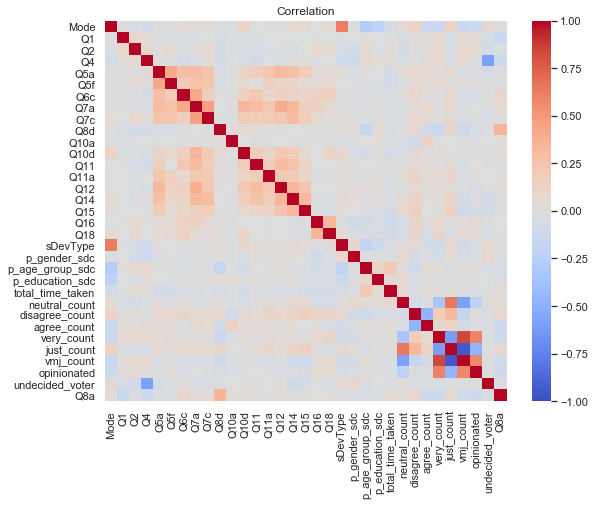

In [43]:
sns.set(rc={'figure.figsize':(9, 7)})
sns.heatmap(data.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm').set_title('Correlation')


In [22]:
data['p_age_group_sdc'].corr(data['total_time_taken'])

0.21539893644993038

In [50]:
data['Q8a'].corr(data['Q8d'])

0.35287171733496203

1.0


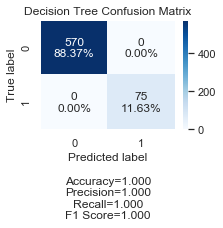

In [24]:
# Decision Tree Classifier
clf = DTClassifier(training_x, training_y)
predictions = clf.predict(testing_x)
accuracy = accuracy_score(testing_y, predictions)
print(accuracy)
cf_matrix = confusion_matrix(testing_y, predictions)
make_confusion_matrix(figsize=(3,2), cf=cf_matrix, cmap='Blues', title='Decision Tree Confusion Matrix')
plt.savefig('Confusion1.png', dpi=300)

[Text(279.0, 326.15999999999997, 'X[29] <= 0.5\ngini = 0.158\nsamples = 1505\nvalue = [1375, 130]'),
 Text(139.5, 108.72000000000003, 'gini = 0.0\nsamples = 1375\nvalue = [1375, 0]'),
 Text(418.5, 108.72000000000003, 'gini = 0.0\nsamples = 130\nvalue = [0, 130]')]

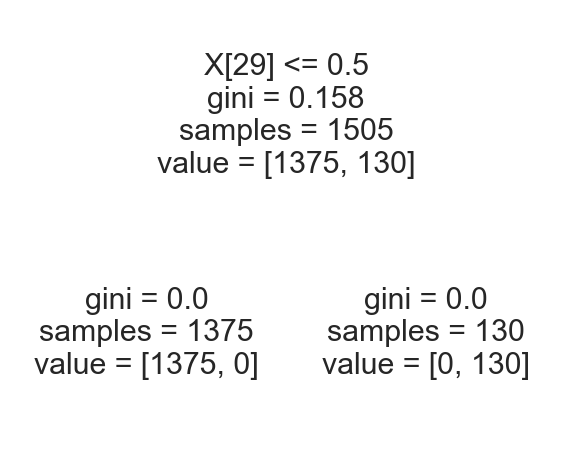

In [25]:
sklearn.tree.plot_tree(clf)

In [46]:
svm = SVMClassifier(training_x, training_y)
predictions = svm.predict(testing_x)
accuracy = accuracy_score(testing_y, predictions)
print(accuracy)

0.9441860465116279


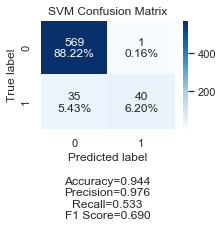

In [47]:
cf_matrix = confusion_matrix(testing_y, predictions)
make_confusion_matrix(figsize=(3,2), cf=cf_matrix, cmap='Blues', title='SVM Confusion Matrix')
plt.savefig('Confusion1.png', dpi=300)

In [28]:
log = LClassifier(training_x, training_y)
predictions = log.predict(testing_x)
accuracy = accuracy_score(testing_y, predictions)
print(accuracy)

0.993798449612403


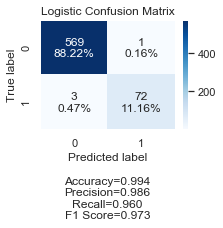

In [29]:
cf_matrix = confusion_matrix(testing_y, predictions)
make_confusion_matrix(figsize=(3,2), cf=cf_matrix, cmap='Blues', title='Logistic Confusion Matrix')
plt.savefig('Confusion1.png', dpi=300)

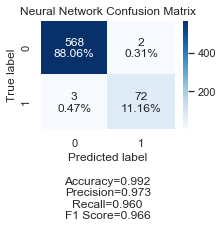

In [30]:
clf4 = MLPClassifier(hidden_layer_sizes=(10), activation='logistic', solver='adam', max_iter=500)
clf4 = clf4.fit(training_x, training_y)
predictions = clf4.predict(testing_x)
cf_matrix = confusion_matrix(testing_y, predictions)
make_confusion_matrix(figsize=(3,2), cf=cf_matrix, cmap='Blues', title='Neural Network Confusion Matrix')